# Yahoo Finance Web Scraper

This notebook demonstrates how to use the yfinance python libary to access all stock related information from https://finance.yahoo.com/. 

### Install Libaries

In [1]:
!pip install yahoo-finance --quiet
!pip install yfinance --quiet

You should consider upgrading via the '/Users/etran/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/etran/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


### Import Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from datetime import datetime
import time
import random
from IPython.core.display import HTML, display

import yfinance as yf

### Configure Jupyter Enviornment

In [2]:
%matplotlib inline

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_colwidth', 255)

display(HTML("<style>.container {width:85%} </style>"))

### Retrieve Data

Below is a screenshot of what data fields we will be web scraping from Yahoo Finance.



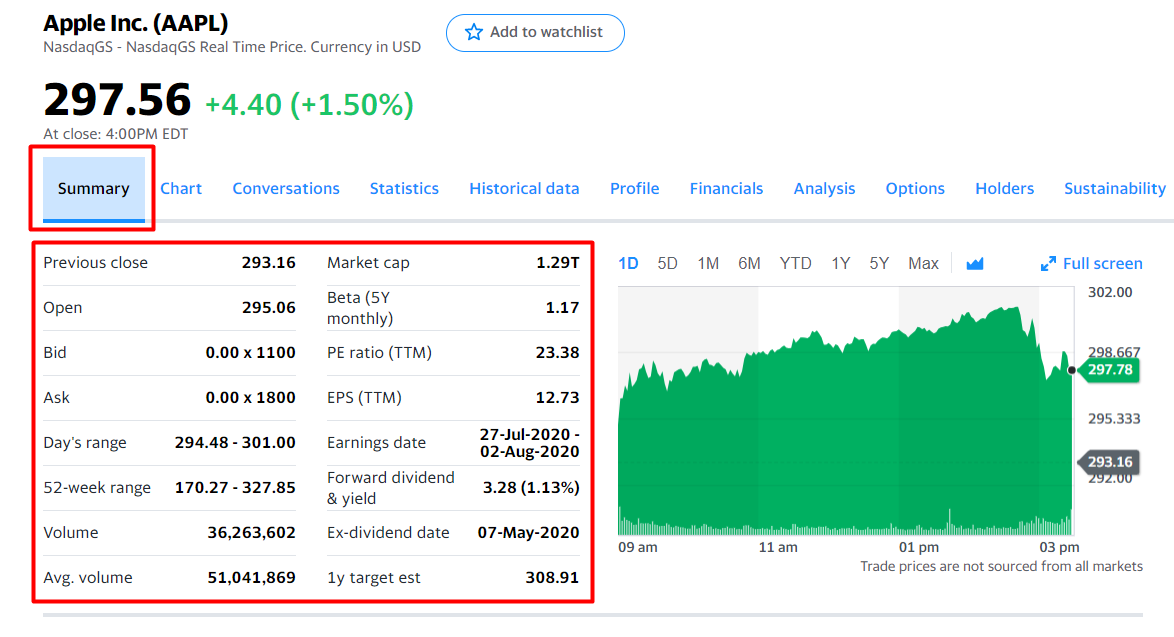

In [3]:
# Top 100 Stocks by Market Cap - https://companiesmarketcap.com/
stocks_list = ['MSFT', 'AMZN', 'GOOG', 'FB', 'TSLA', 'TCEHY', 'BRK-A', 'TSLA', 'BABA', 'TSM', 'V', 'JPM', 'JNJ', 'WMT', 'UNH', 'LVMUY', 'MA', 'NVDA', 'HD', 'BAC', 'NSRGY', 'DIS', 'PG', 'PYPL',
               'ASML', 'CMCSA', 'XOM', 'VZ', 'KO', 'ADBE', 'INTC', 'ORCL', 'T', 'CSCO', 'NFLX', 'PFE', 'NKE', 'TM', 'CVX', 'ABT', 'ABBV', 'PEP', 'CRM', 'MRK', 'WFC', 'UPS', 'ACN', 'AVGO', 
               'DGR', 'TMO', 'MCD', 'TMUS', 'TXN', 'MDT', 'COST', 'PDD', 'SAP', 'MS', 'HON', 'C', 'QCOM', 'UNP', 'RYDAF', 'PM', 'LOW', 'NEE', 'AMGN', 'BMY', 'AZN', 'SIEGY', 'SHOP']

In [3]:
nasdaq_df = pd.read_csv('/Users/etran/data-product/Projects/Web Scrapers/YFinance/nasdaq_screener_05-09-2021.csv')

nasdaq_200 = nasdaq_df[nasdaq_df['Country'] == 'United States'].sort_values('Market Cap', ascending=False).head(200)
nasdaq_200

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
17,AAPL,Apple Inc. Common Stock,$130.21,0.690,0.53%,2.257500e+12,United States,1980.0,78891430,Technology,Computer Manufacturing
4669,MSFT,Microsoft Corporation Common Stock,$252.46,2.730,1.09%,1.901420e+12,United States,1986.0,27009992,Technology,Computer Software: Prepackaged Software
432,AMZN,Amazon.com Inc. Common Stock,"$3,291.61",-14.760,-0.45%,1.660040e+12,United States,1997.0,4706680,Consumer Services,Catalog/Specialty Distribution
3123,GOOG,Alphabet Inc. Class C Capital Stock,"$2,398.69",17.340,0.73%,1.607520e+12,United States,2004.0,1163566,Technology,Internet and Information Services
3124,GOOGL,Alphabet Inc. Class A Common Stock,"$2,351.93",14.580,0.62%,1.576180e+12,United States,NaN,1444455,Technology,Internet and Information Services
2527,FB,Facebook Inc. Class A Common Stock,$319.08,-0.940,-0.29%,9.047400e+11,United States,2012.0,15912769,Technology,Internet and Information Services
6985,TSLA,Tesla Inc. Common Stock,$672.37,8.830,1.33%,6.477140e+11,United States,2010.0,23421564,Capital Goods,Auto Manufacturing
7187,V,Visa Inc.,$232.12,0.800,0.35%,4.950640e+11,United States,NaN,4528712,Miscellaneous,Business Services
3878,JPM,JP Morgan Chase & Co. Common Stock,$161.24,0.550,0.34%,4.880940e+11,United States,NaN,14255574,Finance,Major Banks
3864,JNJ,Johnson & Johnson Common Stock,$168.50,0.760,0.45%,4.437270e+11,United States,NaN,5315649,Health Care,Major Pharmaceuticals


In [4]:
tickers = list(nasdaq_200['Symbol'])
tickers

['AAPL',
 'MSFT',
 'AMZN',
 'GOOG',
 'GOOGL',
 'FB',
 'TSLA',
 'V',
 'JPM',
 'JNJ',
 'WMT',
 'UNH',
 'MA',
 'NVDA',
 'HD',
 'BAC',
 'DIS',
 'PG',
 'PYPL',
 'CMCSA',
 'XOM',
 'VZ',
 'KO',
 'ADBE',
 'INTC',
 'ORCL',
 'T',
 'CSCO',
 'NFLX',
 'PFE',
 'NKE',
 'CVX',
 'ABT',
 'ABBV',
 'PEP',
 'CRM',
 'MRK',
 'WFC',
 'UPS',
 'LLY',
 'AVGO',
 'DHR',
 'TMO',
 'MCD',
 'TMUS',
 'TXN',
 'MDT',
 'COST',
 'MS',
 'HON',
 'C',
 'QCOM',
 'UNP',
 'PM',
 'LOW',
 'NEE',
 'AMGN',
 'BMY',
 'CHTR',
 'BA',
 'SCHW',
 'SBUX',
 'BLK',
 'CAT',
 'IBM',
 'RTX',
 'AXP',
 'GS',
 'SE',
 'DE',
 'AMAT',
 'MMM',
 'GE',
 'CVS',
 'AMT',
 'EL',
 'INTU',
 'LMT',
 'TGT',
 'SQ',
 'ISRG',
 'ANTM',
 'MU',
 'SYK',
 'AMD',
 'BKNG',
 'NOW',
 'FIS',
 'SPGI',
 'MO',
 'USB',
 'CI',
 'ABNB',
 'LRCX',
 'TJX',
 'MDLZ',
 'ZM',
 'PLD',
 'GM',
 'PNC',
 'GILD',
 'FDX',
 'SNAP',
 'ADP',
 'TFC',
 'ZTS',
 'CCI',
 'CSX',
 'FISV',
 'DUK',
 'COP',
 'SHW',
 'ITW',
 'ATVI',
 'CME',
 'NSC',
 'COF',
 'MMC',
 'SO',
 'HCA',
 'BDX',
 'CL',
 'VMW',
 'ECL'

In [ ]:
stocks = []

timeout = time.time() + 900 # [seconds]
start = time.process_time()

for stock in tickers:
    try:
        stock = yf.Ticker(stock)
        data = stock.info
        stocks.append(data)
        time.sleep(1)
    except:
        pass
    finally:
        if time.time() > timeout:
            break
        
print("Execution time: {} Seconds".format(round(time.process_time() - start)))

In [ ]:
stocks

In [ ]:
columns = ['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'state', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 
           'industry', 'previousClose', 'regularMarketOpen', 'twoHundredDayAverage', 'trailingAnnualDividendYield', 'payoutRatio', 'volume24Hr', 'regularMarketDayHigh', 'navPrice', 
           'averageDailyVolume10Day', 'totalAssets', 'regularMarketPreviousClose', 'fiftyDayAverage', 'trailingAnnualDividendRate', 'open', 'toCurrency', 'averageVolume10days', 
           'expireDate', 'yield', 'algorithm', 'dividendRate', 'exDividendDate', 'beta', 'circulatingSupply', 'startDate', 'regularMarketDayLow', 'priceHint', 'currency', 'trailingPE', 
           'regularMarketVolume', 'lastMarket', 'maxSupply', 'openInterest', 'marketCap', 'volumeAllCurrencies', 'strikePrice', 'averageVolume', 'priceToSalesTrailing12Months', 'dayLow', 
           'ask', 'ytdReturn', 'askSize', 'volume', 'fiftyTwoWeekHigh', 'forwardPE', 'fromCurrency', 'fiveYearAvgDividendYield', 'fiftyTwoWeekLow', 'bid', 'tradeable', 'dividendYield', 
           'bidSize', 'dayHigh', 'exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 
           'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'profitMargins', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 
           'forwardEps', 'revenueQuarterlyGrowth', 'sharesOutstanding', 'fundInceptionDate', 'annualReportExpenseRatio', 'bookValue', 'sharesShort', 'sharesPercentSharesOut', 'fundFamily', 
           'lastFiscalYearEnd', 'heldPercentInstitutions', 'netIncomeToCommon', 'trailingEps', 'lastDividendValue', 'SandP52WeekChange', 'priceToBook', 'heldPercentInsiders', 'nextFiscalYearEnd', 
           'mostRecentQuarter', 'shortRatio', 'sharesShortPreviousMonthDate', 'floatShares', 'enterpriseValue', 'threeYearAverageReturn', 'lastSplitDate', 'lastSplitFactor', 'legalType', 
           'lastDividendDate', 'morningStarOverallRating', 'earningsQuarterlyGrowth', 'dateShortInterest', 'pegRatio', 'lastCapGain', 'shortPercentOfFloat', 'sharesShortPriorMonth', 
           'impliedSharesOutstanding', 'category', 'fiveYearAverageReturn', 'regularMarketPrice', 'logo_url']

In [ ]:
df = pd.DataFrame(data=stocks, columns=columns)
df

In [ ]:
df.shape

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Columns: 123 entries, zip to logo_url
dtypes: bool(2), float64(47), int64(22), object(52)
memory usage: 116.6+ KB


In [24]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
fullTimeEmployees,123.0,1.225602e+05,2.470656e+05,1.945000e+03,2.425000e+04,6.700000e+04,1.347500e+05,2.300000e+06
maxAge,123.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
previousClose,123.0,2.860600e+02,4.580600e+02,1.321000e+01,8.474000e+01,1.677400e+02,2.711900e+02,3.306370e+03
regularMarketOpen,123.0,2.875500e+02,4.618400e+02,1.316000e+01,8.515000e+01,1.691900e+02,2.717600e+02,3.319090e+03
twoHundredDayAverage,123.0,2.547600e+02,4.136300e+02,1.027000e+01,7.965000e+01,1.585100e+02,2.380700e+02,3.204400e+03
trailingAnnualDividendYield,98.0,2.000000e-02,1.000000e-02,0.000000e+00,1.000000e-02,2.000000e-02,3.000000e-02,7.000000e-02
payoutRatio,116.0,5.900000e-01,1.210000e+00,0.000000e+00,8.000000e-02,3.100000e-01,6.100000e-01,1.100000e+01
regularMarketDayHigh,123.0,2.910800e+02,4.655900e+02,1.334000e+01,8.612000e+01,1.732200e+02,2.756900e+02,3.330780e+03
averageDailyVolume10Day,123.0,8.863348e+06,1.317292e+07,3.427000e+05,2.160712e+06,4.507525e+06,8.692550e+06,1.020766e+08
regularMarketPreviousClose,123.0,2.860600e+02,4.580600e+02,1.321000e+01,8.474000e+01,1.677400e+02,2.711900e+02,3.306370e+03


In [25]:
df.isnull().sum()

zip                               0
sector                            0
fullTimeEmployees                 0
longBusinessSummary               0
city                              0
phone                             0
state                             2
country                           0
companyOfficers                   0
website                           0
maxAge                            0
address1                          0
industry                          0
previousClose                     0
regularMarketOpen                 0
twoHundredDayAverage              0
trailingAnnualDividendYield      25
payoutRatio                       7
volume24Hr                      123
regularMarketDayHigh              0
navPrice                        123
averageDailyVolume10Day           0
totalAssets                     123
regularMarketPreviousClose        0
fiftyDayAverage                   0
trailingAnnualDividendRate       25
open                              0
toCurrency                  

### Data Enrichment

In [26]:
df['updated_date'] = datetime.today().date()
df['exDividendDate'] = pd.to_datetime(df['exDividendDate'], unit="ms")
df['startDate'] = pd.to_datetime(df['startDate'], unit="ms")
df['fundInceptionDate'] = pd.to_datetime(df['fundInceptionDate'], unit="ms")
df['lastFiscalYearEnd'] = pd.to_datetime(df['lastFiscalYearEnd'], unit="ms")
df['nextFiscalYearEnd'] = pd.to_datetime(df['nextFiscalYearEnd'], unit="ms")
df['mostRecentQuarter'] = pd.to_datetime(df['mostRecentQuarter'], unit="ms")
df['sharesShortPreviousMonthDate'] = pd.to_datetime(df['sharesShortPreviousMonthDate'], unit="ms")
df['lastSplitDate'] = pd.to_datetime(df['lastSplitDate'], unit="ms")
df['lastDividendDate'] = pd.to_datetime(df['lastDividendDate'], unit="ms")

In [27]:
df.sample(5)

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,maxAge,address1,industry,previousClose,regularMarketOpen,twoHundredDayAverage,trailingAnnualDividendYield,payoutRatio,volume24Hr,regularMarketDayHigh,navPrice,averageDailyVolume10Day,totalAssets,regularMarketPreviousClose,fiftyDayAverage,trailingAnnualDividendRate,open,toCurrency,averageVolume10days,expireDate,yield,algorithm,dividendRate,exDividendDate,beta,circulatingSupply,startDate,regularMarketDayLow,priceHint,currency,trailingPE,regularMarketVolume,lastMarket,maxSupply,openInterest,marketCap,volumeAllCurrencies,strikePrice,averageVolume,priceToSalesTrailing12Months,dayLow,ask,ytdReturn,askSize,volume,fiftyTwoWeekHigh,forwardPE,fromCurrency,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,exchange,shortName,longName,exchangeTimezoneName,exchangeTimezoneShortName,isEsgPopulated,gmtOffSetMilliseconds,quoteType,symbol,messageBoardId,market,annualHoldingsTurnover,enterpriseToRevenue,beta3Year,profitMargins,enterpriseToEbitda,52WeekChange,morningStarRiskRating,forwardEps,revenueQuarterlyGrowth,sharesOutstanding,fundInceptionDate,annualReportExpenseRatio,bookValue,sharesShort,sharesPercentSharesOut,fundFamily,lastFiscalYearEnd,heldPercentInstitutions,netIncomeToCommon,trailingEps,lastDividendValue,SandP52WeekChange,priceToBook,heldPercentInsiders,nextFiscalYearEnd,mostRecentQuarter,shortRatio,sharesShortPreviousMonthDate,floatShares,enterpriseValue,threeYearAverageReturn,lastSplitDate,lastSplitFactor,legalType,lastDividendDate,morningStarOverallRating,earningsQuarterlyGrowth,dateShortInterest,pegRatio,lastCapGain,shortPercentOfFloat,sharesShortPriorMonth,impliedSharesOutstanding,category,fiveYearAverageReturn,regularMarketPrice,logo_url,updated_date
5,94025,Communication Services,60654,"Facebook, Inc. develops products that enable people to connect and share with friends and family through mobile devices, personal computers, virtual reality headsets, and in-home devices worldwide. The company's products include Facebook that enables ...",Menlo Park,650-543-4800,CA,United States,[],http://investor.fb.com,1,1601 Willow Road,Internet Content & Information,320.02,322.38,279.605930,NaN,0.0000,None,322.9350,None,25157642,None,320.02,304.685580,NaN,322.38,NaN,25157642,None,None,None,NaN,NaT,1.300000,None,NaT,318.750,2,USD,27.339560,15916743,None,None,None,904738570240,None,None,19886545,9.584197,318.750,319.18,None,1200,15916743,331.8100,20.950754,None,NaN,200.69,318.90,False,NaN,1200,322.9350,NMS,"Facebook, Inc.","Facebook, Inc.",America/New_York,EDT,False,-14400000,EQUITY,FB,finmb_20765463,us_market,None,9.033,None,0.35743,18.784,0.496763,None,15.23,None,2396049920,NaT,None,47.046,30598863,0.0108,None,1970-01-19 15:02:52.800,0.80640,33741000704,11.671,NaN,0.44448,6.782298,0.00578,1970-01-20 08:34:04.800,1970-01-19 17:12:28.800,1.50,1970-01-19 16:49:26.400,2384569216,852662091776,None,NaT,None,None,NaT,None,0.937,1618444800,0.97,None,0.0128,27927478,2.835460e+09,None,None,319.08,https://logo.clearbit.com/investor.fb.com,2021-05-09
56,91320-1799,Healthcare,24300,"Amgen Inc. discovers, develops, manufactures, and delivers human therapeutics worldwide. It focuses on inflammation, oncology/hematology, bone health, cardiovascular disease, nephrology and neuroscience areas. The company's products include Enbrel to ...",Thousand Oaks,805 447 1000,CA,United States,[],http://www.amgen.com,1,One Amgen Center Drive,Drug Manufacturers—General,251.30,251.78,235.367700,0.026104,0.5435,None,255.7300,None,2553975,None,251.30,236.561810,6.56,251.78,NaN,2553975,None,None,None,7.04,1970-01-19 18:15:50.400,0.735245,None,NaT,251.780,2,USD,21.056076,2459734,None,None,None,146057379840,None,None,2765598,5.804220,251.780,254.51,None,900,2459734,276.6900,14.321691,None,2.64,207.33,254.21,False,0.0285,900,255.7300,NMS,Amgen Inc.,Amgen Inc.,America/New_York,EDT,True,-14400000,EQUITY,AMGN,finmb_24816,us_market,None,6.527,None,0.

### Save to Local

In [82]:
df.to_csv('/Users/etran/data-product/Projects/Web Scrapers/YFinance/nasdaq-stock-tickers_{}.csv'.format(datetime.today().date()))

### Save to Cloud

In [17]:
import os
from google.cloud import storage

start = time.process_time()

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'/Users/etran/gcp-analytics.json'

client = storage.Client()
bucket = client.get_bucket('mnd-web-scraper')

# Write to Google Cloud Storage
bucket.blob('yfinance-web-scraper/raw/us-stocks_{}.csv'.format(datetime.today().strftime("%Y-%m-%d"))).upload_from_string(df.to_csv(index=False), 'text/csv')
print('File uploaded to GCP successfully.')
print("Execution time: {} Seconds".format(round(time.process_time() - start)))

File uploaded to GCP successfully.
Execution time: 0 Seconds


### Insert into Google BigQuery

# Parking Lot

In [5]:
msft = yf.Ticker("MSFT")
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 163000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and de

In [6]:
data = msft.info

In [13]:
columns = ['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'state', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 
           'industry', 'previousClose', 'regularMarketOpen', 'twoHundredDayAverage', 'trailingAnnualDividendYield', 'payoutRatio', 'volume24Hr', 'regularMarketDayHigh', 'navPrice', 
           'averageDailyVolume10Day', 'totalAssets', 'regularMarketPreviousClose', 'fiftyDayAverage', 'trailingAnnualDividendRate', 'open', 'toCurrency', 'averageVolume10days', 
           'expireDate', 'yield', 'algorithm', 'dividendRate', 'exDividendDate', 'beta', 'circulatingSupply', 'startDate', 'regularMarketDayLow', 'priceHint', 'currency', 'trailingPE', 
           'regularMarketVolume', 'lastMarket', 'maxSupply', 'openInterest', 'marketCap', 'volumeAllCurrencies', 'strikePrice', 'averageVolume', 'priceToSalesTrailing12Months', 'dayLow', 
           'ask', 'ytdReturn', 'askSize', 'volume', 'fiftyTwoWeekHigh', 'forwardPE', 'fromCurrency', 'fiveYearAvgDividendYield', 'fiftyTwoWeekLow', 'bid', 'tradeable', 'dividendYield', 
           'bidSize', 'dayHigh', 'exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 
           'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'profitMargins', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 
           'forwardEps', 'revenueQuarterlyGrowth', 'sharesOutstanding', 'fundInceptionDate', 'annualReportExpenseRatio', 'bookValue', 'sharesShort', 'sharesPercentSharesOut', 'fundFamily', 
           'lastFiscalYearEnd', 'heldPercentInstitutions', 'netIncomeToCommon', 'trailingEps', 'lastDividendValue', 'SandP52WeekChange', 'priceToBook', 'heldPercentInsiders', 'nextFiscalYearEnd', 
           'mostRecentQuarter', 'shortRatio', 'sharesShortPreviousMonthDate', 'floatShares', 'enterpriseValue', 'threeYearAverageReturn', 'lastSplitDate', 'lastSplitFactor', 'legalType', 
           'lastDividendDate', 'morningStarOverallRating', 'earningsQuarterlyGrowth', 'dateShortInterest', 'pegRatio', 'lastCapGain', 'shortPercentOfFloat', 'sharesShortPriorMonth', 
           'impliedSharesOutstanding', 'category', 'fiveYearAverageReturn', 'regularMarketPrice', 'logo_url']

In [25]:
df = pd.DataFrame(data=data, index=columns)
df = df.T
df

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,maxAge,address1,industry,previousClose,regularMarketOpen,twoHundredDayAverage,trailingAnnualDividendYield,payoutRatio,volume24Hr,regularMarketDayHigh,navPrice,averageDailyVolume10Day,totalAssets,regularMarketPreviousClose,fiftyDayAverage,trailingAnnualDividendRate,open,toCurrency,averageVolume10days,expireDate,yield,algorithm,dividendRate,exDividendDate,beta,circulatingSupply,startDate,regularMarketDayLow,priceHint,currency,trailingPE,regularMarketVolume,lastMarket,maxSupply,openInterest,marketCap,volumeAllCurrencies,strikePrice,averageVolume,priceToSalesTrailing12Months,dayLow,ask,ytdReturn,askSize,volume,fiftyTwoWeekHigh,forwardPE,fromCurrency,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,exchange,shortName,longName,exchangeTimezoneName,exchangeTimezoneShortName,isEsgPopulated,gmtOffSetMilliseconds,quoteType,symbol,messageBoardId,market,annualHoldingsTurnover,enterpriseToRevenue,beta3Year,profitMargins,enterpriseToEbitda,52WeekChange,morningStarRiskRating,forwardEps,revenueQuarterlyGrowth,sharesOutstanding,fundInceptionDate,annualReportExpenseRatio,bookValue,sharesShort,sharesPercentSharesOut,fundFamily,lastFiscalYearEnd,heldPercentInstitutions,netIncomeToCommon,trailingEps,lastDividendValue,SandP52WeekChange,priceToBook,heldPercentInsiders,nextFiscalYearEnd,mostRecentQuarter,shortRatio,sharesShortPreviousMonthDate,floatShares,enterpriseValue,threeYearAverageReturn,lastSplitDate,lastSplitFactor,legalType,lastDividendDate,morningStarOverallRating,earningsQuarterlyGrowth,dateShortInterest,pegRatio,lastCapGain,shortPercentOfFloat,sharesShortPriorMonth,impliedSharesOutstanding,category,fiveYearAverageReturn,regularMarketPrice,logo_url
0,98052-6399,Technology,163000,"Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and ...",Redmond,425 882 8080,WA,United States,[],http://www.microsoft.com,1,One Microsoft Way,Software—Infrastructure,249.73,252.15,230.11598,0.008769,0.2916,None,254.3,None,28471914,None,249.73,249.88823,2.19,252.15,None,28471914,None,None,None,2.24,1621382400,0.787165,None,None,251.17,2,USD,34.404472,22795257,None,None,None,1901420216320,None,None,28393346,11.886179,251.17,252.59,None,3100,22795257,263.19,30.23473,None,1.63,175.68,252.55,False,0.0089,2900,254.3,NMS,Microsoft Corporation,Microsoft Corporation,America/New_York,EDT,False,-14400000,EQUITY,MSFT,finmb_21835,us_market,None,11.613,None,0.35016,24.579,0.351933,None,8.35,None,7531570176,None,None,17.853,61156879,0.0081,None,1593475200,0.7237,56014999552,7.338,0.56,0.44448,14.141041,0.00073,1656547200,1617148800,2.11,1615766400,7420408511,1857668251648,None,1045526400,2:1,None,1613520000,None,0.438,1618444800,2.01,None,0.0081,49574419,None,None,None,252.46,https://logo.clearbit.com/microsoft.com


In [25]:
msft_hist = msft.history(period="10d")
msft_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-26,261.660004,262.440002,260.170013,261.549988,19763300,0,0
2021-04-27,261.579987,263.190002,260.119995,261.970001,31014200,0,0
2021-04-28,256.079987,256.540009,252.949997,254.559998,46903100,0,0
2021-04-29,255.460007,256.100006,249.000000,252.509995,40589000,0,0
2021-04-30,249.740005,253.080002,249.600006,252.179993,30929200,0,0
2021-05-03,253.399994,254.350006,251.119995,251.860001,19626600,0,0
2021-05-04,250.970001,251.210007,245.759995,247.789993,32756100,0,0
2021-05-05,249.059998,249.500000,245.820007,246.470001,21901300,0,0
2021-05-06,246.449997,249.860001,244.690002,249.729996,26491100,0,0


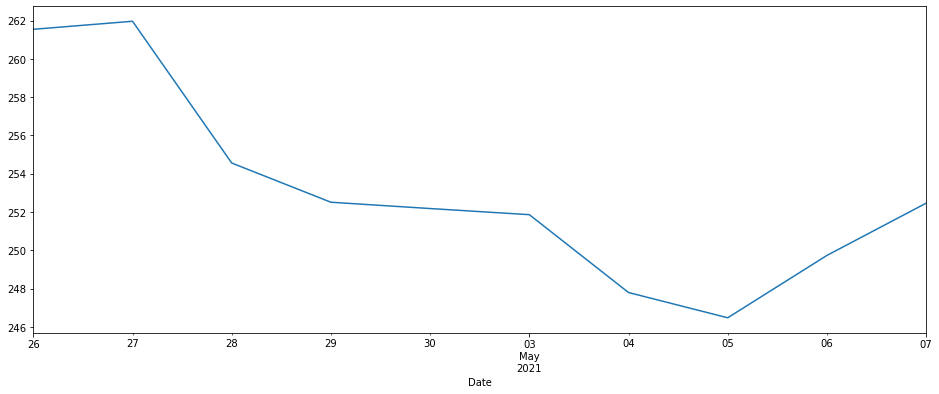

In [27]:
msft_hist['Close'].plot(figsize=(16,6))

In [13]:
msft.actions

,Dividends,Stock Splits
Date,,
1987-09-21,0.00,2.0
1990-04-16,0.00,2.0
1991-06-27,0.00,1.5
1992-06-15,0.00,1.5
1994-05-23,0.00,2.0
1996-12-09,0.00,2.0
1998-02-23,0.00,2.0
1999-03-29,0.00,2.0
2003-02-18,0.00,2.0


In [16]:
msft.balancesheet

,2020-06-30,2019-06-30,2018-06-30,2017-06-30
Intangible Assets,7.038000e+09,7.750000e+09,8.053000e+09,1.010600e+10
Total Liab,1.830070e+11,1.842260e+11,1.761300e+11,1.626010e+11
Total Stockholder Equity,1.183040e+11,1.023300e+11,8.271800e+10,8.771100e+10
Other Current Liab,4.600100e+10,4.586000e+10,3.819500e+10,3.087900e+10
Total Assets,3.013110e+11,2.865560e+11,2.588480e+11,2.503120e+11
Common Stock,8.055200e+10,7.852000e+10,7.122300e+10,6.931500e+10
Other Current Assets,1.151700e+10,1.013300e+10,6.855000e+09,5.183000e+09
Retained Earnings,3.456600e+10,2.415000e+10,1.368200e+10,1.776900e+10
Other Liab,3.449200e+10,3.569900e+10,3.570700e+10,2.298600e+10
Good Will,4.335100e+10,4.202600e+10,3.568300e+10,3.512200e+10


In [17]:
msft.calendar

,0,1
Earnings Date,2021-07-20 00:00:00,2021-07-26 00:00:00
Earnings Average,1.9,1.9
Earnings Low,1.64,1.64
Earnings High,2.03,2.03
Revenue Average,44078100000,44078100000
Revenue Low,40850000000,40850000000
Revenue High,45019500000,45019500000


In [18]:
msft.cashflow

,2020-06-30,2019-06-30,2018-06-30,2017-06-30
Investments,6.980000e+09,5.400000e+08,6.557000e+09,-1.251100e+10
Change To Liabilities,5.230000e+09,4.694000e+09,7.070000e+09,3.901000e+09
Total Cashflows From Investing Activities,-1.222300e+10,-1.577300e+10,-6.061000e+09,-4.678100e+10
Net Borrowings,-5.518000e+09,-4.000000e+09,-1.020100e+10,3.145900e+10
Total Cash From Financing Activities,-4.603100e+10,-3.688700e+10,-3.359000e+10,8.408000e+09
Change To Operating Activities,-6.730000e+08,-1.542000e+09,-4.590000e+08,3.490000e+08
Issuance Of Stock,1.343000e+09,1.142000e+09,1.002000e+09,7.720000e+08
Net Income,4.428100e+10,3.924000e+10,1.657100e+10,2.548900e+10
Change In Cash,2.220000e+09,-5.900000e+08,4.283000e+09,1.153000e+09
Repurchase Of Stock,-2.296800e+10,-1.954300e+10,-1.072100e+10,-1.178800e+10


In [19]:
msft.dividends

Date
2003-02-19    0.08
2003-10-15    0.16
2004-08-23    0.08
2004-11-15    3.08
2005-02-15    0.08
2005-05-16    0.08
2005-08-15    0.08
2005-11-15    0.08
2006-02-15    0.09
2006-05-15    0.09
2006-08-15    0.09
2006-11-14    0.10
2007-02-13    0.10
2007-05-15    0.10
2007-08-14    0.10
2007-11-13    0.11
2008-02-19    0.11
2008-05-13    0.11
2008-08-19    0.11
2008-11-18    0.13
2009-02-17    0.13
2009-05-19    0.13
2009-08-18    0.13
2009-11-17    0.13
2010-02-16    0.13
2010-05-18    0.13
2010-08-17    0.13
2010-11-16    0.16
2011-02-15    0.16
2011-05-17    0.16
2011-08-16    0.16
2011-11-15    0.20
2012-02-14    0.20
2012-05-15    0.20
2012-08-14    0.20
2012-11-13    0.23
2013-02-19    0.23
2013-05-14    0.23
2013-08-13    0.23
2013-11-19    0.28
2014-02-18    0.28
2014-05-13    0.28
2014-08-19    0.28
2014-11-18    0.31
2015-02-17    0.31
2015-05-19    0.31
2015-08-18    0.31
2015-11-17    0.36
2016-02-16    0.36
2016-05-17    0.36
2016-08-16    0.36
2016-11-15    0.39
2017-02

In [20]:
msft.earnings

,Revenue,Earnings
Year,,
2017,96571000000,25489000000
2018,110360000000,16571000000
2019,125843000000,39240000000
2020,143015000000,44281000000


In [21]:
msft.financials

,2020-06-30,2019-06-30,2018-06-30,2017-06-30
Research Development,19269000000.0,16876000000.0,14726000000.0,13037000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,53036000000.0,43688000000.0,36474000000.0,29901000000.0
Minority Interest,None,None,None,None
Net Income,44281000000.0,39240000000.0,16571000000.0,25489000000.0
Selling General Administrative,24709000000.0,23098000000.0,22223000000.0,19942000000.0
Gross Profit,96937000000.0,82933000000.0,72007000000.0,62310000000.0
Ebit,52959000000.0,42959000000.0,35058000000.0,29331000000.0
Operating Income,52959000000.0,42959000000.0,35058000000.0,29331000000.0
Other Operating Expenses,None,None,None,None


In [69]:
msft.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-08,252.770004,254.139999,252.000000,253.250000,23625200,0,0
2021-04-09,252.869995,255.990005,252.440002,255.850006,24326800,0,0
2021-04-12,254.710007,257.670013,254.619995,255.910004,27148700,0,0
2021-04-13,257.260010,259.190002,256.829987,258.489990,23837500,0,0
2021-04-14,257.480011,258.829987,255.160004,255.589996,23070900,0,0
2021-04-15,257.929993,259.929993,257.730011,259.500000,25627500,0,0
2021-04-16,259.470001,261.000000,257.600006,260.739990,24878600,0,0
2021-04-19,260.190002,261.480011,257.820007,258.739990,23209300,0,0
2021-04-20,257.820007,260.200012,256.839996,258.260010,19722900,0,0


In [70]:
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",614100233,2020-12-30,0.0815,136588173823
1,Blackrock Inc.,515509179,2020-12-30,0.0684,114659551593
2,State Street Corporation,299126371,2020-12-30,0.0397,66531687437
3,"FMR, LLC",222257473,2020-12-30,0.0295,49434507144
4,Price (T.Rowe) Associates Inc,177500157,2020-12-30,0.0236,39479584919
5,"Geode Capital Management, LLC",117798162,2020-12-30,0.0156,26200667192
6,Capital World Investors,110441260,2020-12-30,0.0147,24564345049
7,Capital Research Global Investors,95506129,2020-12-30,0.0127,21242473212
8,Capital International Investors,91995988,2020-12-30,0.0122,20461747650
9,Northern Trust Corporation,91215100,2020-12-30,0.0121,20288062542


In [73]:
msft.isin

'US5949181045'

In [75]:
msft.major_holders.sort_values(0, ascending=False)

,0,1
2,72.42%,% of Float Held by Institutions
1,72.37%,% of Shares Held by Institutions
3,5272,Number of Institutions Holding Shares
0,0.07%,% of Shares Held by All Insider


In [76]:
msft.mutualfund_holders

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Total Stock Market Index Fund,213074576,2020-12-30,0.0283,47392047193
1,Vanguard 500 Index Fund,151495446,2020-12-30,0.0201,33695617099
2,SPDR S&P 500 ETF Trust,78233730,2021-03-30,0.0104,18445166522
3,Fidelity 500 Index Fund,68466572,2021-02-27,0.0091,15910262001
4,"Invesco ETF Tr-Invesco QQQ Tr, Series 1 ETF",62528113,2021-03-30,0.0083,14742253202
5,Vanguard Institutional Index Fund-Institutional Index Fund,62176808,2020-12-30,0.0083,13829365635
6,Vanguard Growth Index Fund,59959855,2020-12-30,0.0080,13336270949
7,iShares Core S&P 500 ETF,58673817,2021-03-30,0.0078,13833525834
8,Growth Fund Of America Inc,54525474,2021-03-30,0.0072,12855471004
9,Washington Mutual Investors Fund,32883928,2021-03-30,0.0044,7753043704


In [80]:
msft.option_chain()

Options(calls=         contractSymbol       lastTradeDate  strike  lastPrice     bid  \
0   MSFT210514C00125000 2021-05-04 15:38:11   125.0     121.65  127.05   
1   MSFT210514C00130000 2021-04-30 19:38:40   130.0     122.35  122.10   
2   MSFT210514C00145000 2021-04-27 13:47:11   145.0     115.90  107.20   
3   MSFT210514C00150000 2021-05-03 19:12:08   150.0     101.65  102.05   
4   MSFT210514C00155000 2021-05-04 13:32:56   155.0      95.20   97.20   
5   MSFT210514C00175000 2021-04-19 16:32:42   175.0      83.30   77.05   
6   MSFT210514C00185000 2021-05-04 17:40:25   185.0      61.70   67.05   
7   MSFT210514C00190000 2021-05-03 15:51:44   190.0      62.55   62.05   
8   MSFT210514C00195000 2021-04-23 17:36:43   195.0      65.85   57.05   
9   MSFT210514C00200000 2021-05-07 16:50:05   200.0      52.95   52.05   
10  MSFT210514C00205000 2021-05-07 19:45:44   205.0      47.85   47.05   
11  MSFT210514C00210000 2021-04-26 18:28:59   210.0      51.55   42.10   
12  MSFT210514C00215000 

In [84]:
msft.quarterly_balancesheet

,2021-03-31,2020-12-31,2020-09-30,2020-06-30
Intangible Assets,8.127000e+09,6.555000e+09,6.923000e+09,7.038000e+09
Total Liab,1.743740e+11,1.739010e+11,1.776090e+11,1.830070e+11
Total Stockholder Equity,1.345050e+11,1.302360e+11,1.233920e+11,1.183040e+11
Other Current Liab,4.006900e+10,3.992600e+10,4.299600e+10,4.600100e+10
Total Assets,3.088790e+11,3.041370e+11,3.010010e+11,3.013110e+11
Common Stock,8.230800e+10,8.189600e+10,8.108900e+10,8.055200e+10
Other Current Assets,1.203400e+10,1.274800e+10,1.357200e+10,1.151700e+10
Retained Earnings,5.073500e+10,4.497300e+10,3.919300e+10,3.456600e+10
Other Liab,3.160100e+10,3.158500e+10,3.317400e+10,3.449200e+10
Good Will,4.969800e+10,4.421900e+10,4.389000e+10,4.335100e+10


In [83]:
msft.quarterly_cashflow

,2021-03-31,2020-12-31,2020-09-30,2020-06-30
Investments,2.517000e+09,2.593000e+09,2.100000e+09,3.173000e+09
Change To Liabilities,3.600000e+08,-3.194000e+09,-2.749000e+09,1.180200e+10
Total Cashflows From Investing Activities,-9.684000e+09,-1.669000e+09,-5.371000e+09,-4.462000e+09
Net Borrowings,-5.000000e+08,-3.250000e+09,-3.250000e+09,-3.250000e+09
Total Cash From Financing Activities,-1.319200e+10,-1.363400e+10,-1.028900e+10,-1.226200e+10
Change To Operating Activities,1.305000e+09,1.879000e+09,-2.823000e+09,6.430000e+08
Issuance Of Stock,3.960000e+08,3.020000e+08,5.450000e+08,3.400000e+08
Net Income,1.545700e+10,1.546300e+10,1.389300e+10,1.120200e+10
Change In Cash,-7.300000e+08,-2.773000e+09,3.629000e+09,1.866000e+09
Repurchase Of Stock,-6.930000e+09,-6.535000e+09,-6.743000e+09,-5.791000e+09


In [85]:
msft.quarterly_earnings

,Revenue,Earnings
Quarter,,
2Q2020,38033000000,11202000000
3Q2020,37154000000,13893000000
4Q2020,43076000000,15463000000
1Q2021,41706000000,15457000000


In [86]:
msft.quarterly_financials

,2021-03-31,2020-12-31,2020-09-30,2020-06-30
Research Development,5204000000.0,4899000000.0,4926000000.0,5214000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,17236000000.0,18337000000.0,16124000000.0,13422000000.0
Minority Interest,None,None,None,None
Net Income,15457000000.0,15463000000.0,13893000000.0,11202000000.0
Selling General Administrative,6409000000.0,6086000000.0,5350000000.0,7073000000.0
Gross Profit,28661000000.0,28882000000.0,26152000000.0,25694000000.0
Ebit,17048000000.0,17897000000.0,15876000000.0,13407000000.0
Operating Income,17048000000.0,17897000000.0,15876000000.0,13407000000.0
Other Operating Expenses,None,None,None,None


In [89]:
msft.session

<module 'requests' from '/Users/etran/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py'>

In [90]:
msft.splits

Series([], Name: Stock Splits, dtype: int64)

In [91]:
msft.sustainability

,Value
2021-3,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,9.37
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [62]:
msft.get_recommendations()

,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-16 08:19:00,Argus Research,Buy,,up
2012-03-19 14:00:00,Hilliard Lyons,Long-Term Buy,,main
2012-03-22 07:03:00,Morgan Stanley,Overweight,,main
2012-04-03 11:53:00,UBS,Buy,,main
2012-04-20 06:18:00,Deutsche Bank,Buy,,main
2012-04-20 06:44:00,Goldman Sachs,Neutral,,main
2012-04-20 07:05:00,Bank oferica,Buy,,main
2012-04-20 11:51:00,UBS,Buy,,main
2012-04-20 12:28:00,McAdams Wright Ragen,Buy,,main


### Download Data

In [58]:
def download_data(ticker, start_date, end_date):
    stock = yf.download(ticker, start=start_date, end=end_date)
    stock.insert(0, "Ticker", ticker.upper())
    stock.to_csv('{}_{}.csv'.format(ticker, datetime.today().date()))
    return stock.head()

In [59]:
download_data('aapl', "2021-01-01", "2021-05-08")

[*********************100%***********************]  1 of 1 completed


,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-01-04,AAPL,133.520004,133.610001,126.760002,129.410004,128.997803,143301900
2021-01-05,AAPL,128.889999,131.740005,128.429993,131.009995,130.592697,97664900
2021-01-06,AAPL,127.720001,131.050003,126.379997,126.599998,126.196747,155088000
2021-01-07,AAPL,128.360001,131.630005,127.860001,130.919998,130.502991,109578200
2021-01-08,AAPL,132.429993,132.630005,130.229996,132.050003,131.629379,105158200


In [60]:
apple = yf.download("AAPL", start='2021-01-01', end="2021-05-08")

[*********************100%***********************]  1 of 1 completed


In [61]:
apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.997803,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,130.592697,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,126.196747,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,130.502991,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,131.629379,105158200
2021-01-11,129.190002,130.169998,128.500000,128.979996,128.569168,100384500
2021-01-12,128.500000,129.690002,126.860001,128.800003,128.389740,91951100
2021-01-13,128.759995,131.449997,128.490005,130.889999,130.473083,88636800
2021-01-14,130.800003,131.000000,128.759995,128.910004,128.499405,90221800
